Import the necessary libaries.

In [74]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing as pre
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import re
print("Setup Complete")

/kaggle/input/combinedalgaedata/CPPonds5and6_with_summary_combined_sorted_and_filtered_in.csv
/kaggle/input/the-algae-testbed-publicprivate-partnership-atp3/ATP3-UFS-PondOperationalData.csv
/kaggle/input/the-algae-testbed-publicprivate-partnership-atp3/ATP3-UFS-Instrumentation.csv
/kaggle/input/the-algae-testbed-publicprivate-partnership-atp3/ATP3-UFS-SummaryCombinedData.csv
/kaggle/input/the-algae-testbed-publicprivate-partnership-atp3/ATP3-UFS-Instrumentation-daily.csv
/kaggle/input/the-algae-testbed-publicprivate-partnership-atp3/ATP3-UFS-Composition.csv
/kaggle/input/the-algae-testbed-publicprivate-partnership-atp3/ATP3-UFS-HarvestData.csv
/kaggle/input/the-algae-testbed-publicprivate-partnership-atp3/ATP3-UFS-Weather-daily.csv
/kaggle/input/the-algae-testbed-publicprivate-partnership-atp3/ATP3-UFS-Weather.csv
/kaggle/input/summarycombined/CPPonds5and6_with_summary_combined_sorted_and_filtered_in.csv
Setup Complete


Visualize the head of the composition data file.

In [75]:
composition_data = pd.read_csv("../input/summarycombined/CPPonds5and6_with_summary_combined_sorted_and_filtered_in.csv", index_col=0)
composition_data.head()

,A#N/Alytical.Sample.ID,DATETIME,Protein.AF,FAME.Lipids.AF,Carbohydrates.AF,ExperimentID,SiteID,StrainID,SourceID,BatchID,...,P.efficiency..,P.demand.g.P.g.AFDW,mg.AFDW_mol.PAR.input,mg.AFDW_kW.GLE.input,Dates,RH(%),GlobalLightEnergy(W.m2),WindSpeed(km.hr),WDir(deg),Precip.tot(cm)
Tracking.ID,,,,,,,,,,,,,,,,,,,,,
86.0,P5_8Nov2013,41586.40278,40.65,15.46,7.64,OCT172013,CP,KA32,KA32_4Oct2013_Panels,KA32_4Oct2013,...,NaN,NaN,NaN,NaN,10/31/2013,43.08,176.79,2.50,115.38,0.0
99.0,P6_25Nov2013,41603.40625,39.44,20.72,9.18,OCT172013,CP,KA32,KA32_9Oct2013_Pond3,KA32_9Oct2013,...,0.0,NaN,NaN,NaN,11/8/2013,40.54,166.17,1.43,130.75,0.0
103.0,P5_29Nov2013,41607.35069,33.42,26.44,11.28,OCT172013,CP,KA32,KA32_9Oct2013_Pond3,KA32_9Oct2013,...,NaN,NaN,NaN,NaN,11/22/2013,48.62,99.08,2.19,66.54,0.0
109.0,P5_2Dec2013,41610.35764,31.28,27.63,10.72,OCT172013,CP,KA32,KA32_9Oct2013_Pond3,KA32_9Oct2013,...,NaN,NaN,NaN,NaN,11/25/2013,39.21,145.08,2.72,69.04,0.0
80.0,P5_31Oct13,41578.34375,48.96,16.42,8.32,OCT172013,CP,KA32,KA32_4Oct2013_Panels,KA32_4Oct2013,...,NaN,NaN,NaN,NaN,11/29/2013,52.46,84.83,1.25,107.38,0.0


In [76]:
a = composition_data
x = composition_data.loc[composition_data.StrainID == 'KA32']#.loc[composition_data['Harvest.'] == composition_data.notna]
print(x.size)
x = x[x['Harvest.'].notna()]
x = x[x['FAME.Lipids.AF'].notna()]
x = x[x['AFDW..g.'].notna()]
print(x.size)
x['totalLipids'] = x['Harvest.Vol..L.'] * x['FAME.Lipids.AF']

5112
1633


In [77]:
#x.shape
#x.isnull().sum()
#x = x.fillna(x.mean())
#x.head(10)

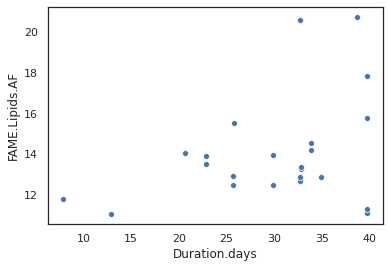

In [78]:
sns.scatterplot(x['Duration.days'], x['FAME.Lipids.AF'])


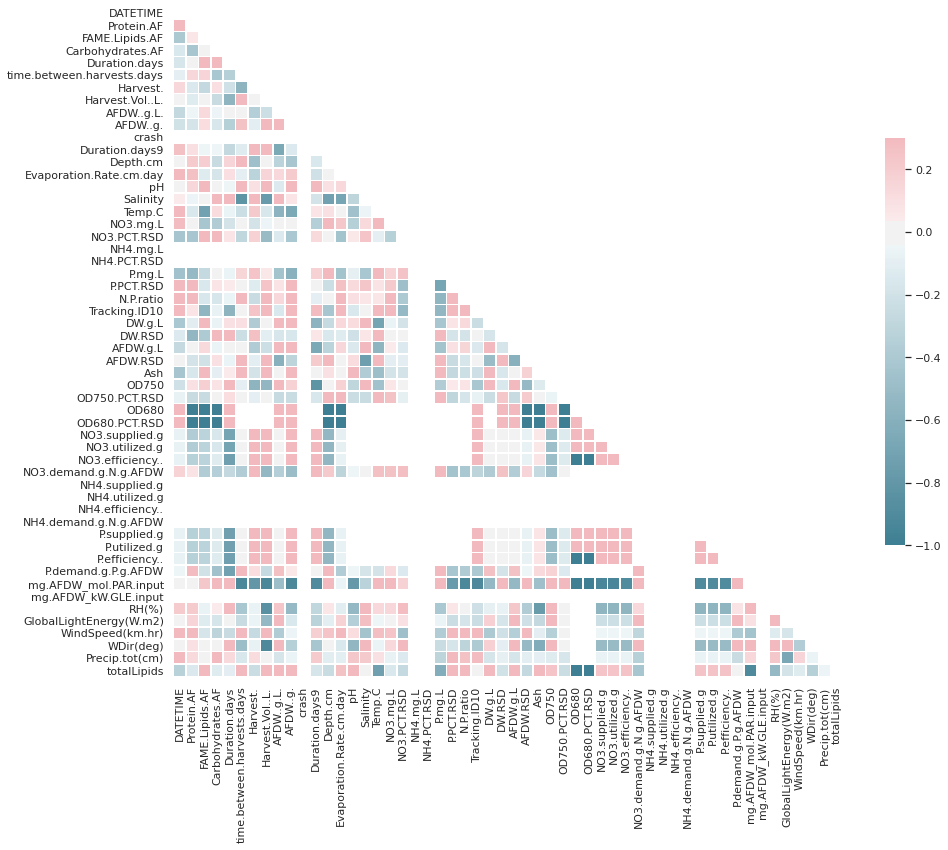

In [83]:
sns.set(style="white")
corr = x.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

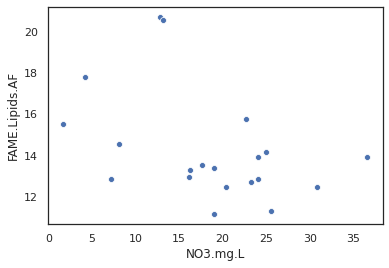

In [80]:
sns.scatterplot(x['NO3.mg.L'], x['FAME.Lipids.AF'])


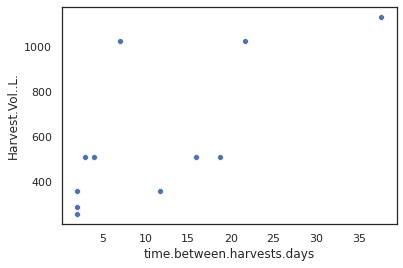

In [81]:
sns.scatterplot(x['time.between.harvests.days'], x['Harvest.Vol..L.'])

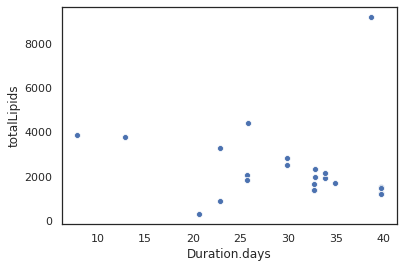

In [84]:
sns.scatterplot(x['Duration.days'], x['totalLipids'])